In [ ]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
df = pd.read_csv('/content/생필품 농수축산물 가격 정보(2021년1월_6월).csv', encoding='cp949')

In [ ]:
df_egg = df[ (df['품목 이름'].str.contains('달걀')) & 
            (df['실판매규격'].str.contains('30')) & 
            (df['년도-월'] =='2021-06')]
df_egg

,일련번호,시장/마트 번호,시장/마트 이름,품목 번호,품목 이름,실판매규격,가격(원),년도-월,비고,시장유형 구분(시장/마트) 코드,시장유형 구분(시장/마트) 이름,자치구 코드,자치구 이름,점검일자
28,1668434,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24
43,1670908,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
52,1667084,10,용문시장,320,달걀(30개),30개,10500,2021-06,건강영양란,1,전통시장,170000,용산구,2021-06-24
62,1671401,42,이마트 가양점,320,달걀(30개),30개(1800g),6900,2021-06,"국내산,특란",2,대형마트,500000,강서구,2021-06-24
75,1667237,82,롯데마트 강변점,320,달걀(30개),30개,10800,2021-06,1등급란.특란,2,대형마트,215000,광진구,2021-06-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6749,1667596,102,목3동시장,320,달걀(30개),30구,10100,2021-06,"국내산,정심특란",1,전통시장,470000,양천구,2021-06-24
6756,1672097,102,목3동시장,320,달걀(30개),30개,9800,2021-06,"국내산 ,특란",1,전통시장,470000,양천구,2021-06-24
6771,1674008,102,목3동시장,320,달걀(30개),30개,9500,2021-06,"국내산,특란",1,전통시장,470000,양천구,2021-06-24
6779,1674903,16,현대백화점 미아점,320,달걀(30개),30개,0,2021-06,입고안됨,2,대형마트,290000,성북구,2021-06-24


In [ ]:
# 달걀 30구 평균가격, 최고가, 최저가 구하기
df_egg['가격(원)'].mean(), df_egg['가격(원)'].max(), df_egg['가격(원)'].min()

(9040.308157099698, 75000, 0)

살고 있는 구를 입력하세요: 강서구




,시장/마트 이름,품목 이름,실판매규격,가격(원)
62,이마트 가양점,달걀(30개),30개(1800g),6900
643,홈플러스 등촌점,달걀(30개),30개(1800g),6900
5950,화곡본동시장,달걀(30개),30개(1860g),10000
5987,화곡본동시장,달걀(30개),30개(1860g),9500
6067,송화시장,달걀(30개),30개(1860g),10000
6535,홈플러스 등촌점,달걀(30개),30개(1800g),6950
6541,홈플러스 등촌점,달걀(30개),30개(1800g),7790


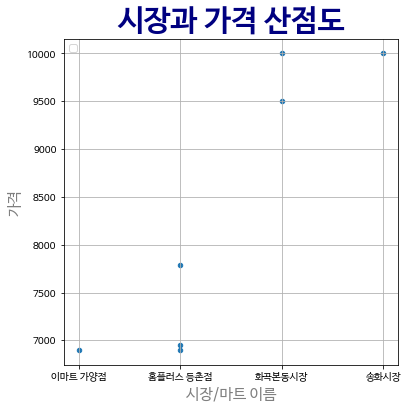

In [ ]:
# 우리동네 달걀가격
# 우리구 달걀가격
# 시각화
dongne2 = input('살고 있는 구를 입력하세요: ')
print('\n')
df_egg_dongne2 = df_egg[df_egg['자치구 이름'] == dongne2][['시장/마트 이름','품목 이름','실판매규격','가격(원)']].drop_duplicates()
display(df_egg_dongne2)
print('\n')

#산점도
df_egg_dongne2.plot(x='시장/마트 이름', y='가격(원)', kind='scatter', grid=True, figsize=(6,6))
plt.title('시장과 가격 산점도', size=30, color='navy', weight='bold')
plt.ylabel('가격', size=15, color='grey')
plt.xlabel('시장/마트 이름', size=15, color='grey')
plt.legend(loc='upper left', fontsize=10)
plt.show()

검색하고 싶은 마트이름 입력: 백화점




,시장/마트 이름,품목 이름,실판매규격,가격(원)
28,현대백화점 미아점,달걀(30개),30개,0
1002,롯데백화점 강남점,달걀(30개),30개,17000
1139,롯데백화점 청량리점,달걀(30개),30개,0
1227,NC백화점 불광점,달걀(30개),30개(1800g),8590
1535,NC백화점 불광점,달걀(30개),30개(1.8kg),8990
1821,롯데백화점,달걀(30개),30개(1560g),15800
1878,NC백화점 불광점,달걀(30개),30개(1800g),8990
1977,롯데백화점 노원점,달걀(30개),30개,11000
2572,태평백화점,달걀(30개),30개(1560g),9800
2578,롯데백화점,달걀(30개),30개(1560g),18960


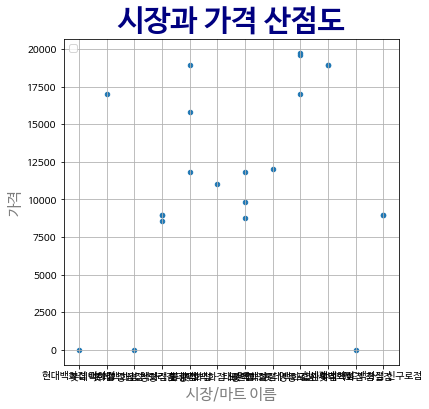

In [11]:
# 마트지점별 달걀가격
# 시각화
where = input('검색하고 싶은 마트이름 입력: ')
print('\n')

df_egg_where = df_egg[df_egg['시장/마트 이름'].str.contains(where)][['시장/마트 이름','품목 이름','실판매규격','가격(원)']].drop_duplicates()
display(df_egg_where)
print('\n')

#산점도
df_egg_where.plot(x='시장/마트 이름', y='가격(원)', kind='scatter', grid=True, figsize=(6,6))
plt.title('시장과 가격 산점도', size=30, color='navy', weight='bold')
plt.ylabel('가격', size=15, color='grey')
plt.xlabel('시장/마트 이름', size=15, color='grey')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [12]:
# html 파일로 만들기
%%shell
jupyter nbconvert --to html /content/egg.ipynb

[NbConvertApp] Converting notebook /content/egg.ipynb to html
[NbConvertApp] Writing 344570 bytes to /content/egg.html
